In [3]:
import os
import pandas as pd
import numpy  as np
from scipy.fft    import dct, idct
from scipy.signal import butter, savgol_filter, ellip, filtfilt, detrend
from matplotlib   import pylab as plt

## Load data

In [4]:
# paths were the preprocessed data is
root_path = 'data/'
data_path = os.path.join(root_path, 'Processed')
emg_path  = os.path.join(data_path, 'EMG')
questionnaire_path = os.path.join(root_path, 'Experiment', 'questionnaire')

# paths were the output should be
out_path = os.path.join(root_path, 'Music-resonance')

# check if the output folders exist and create them if necessary
for folder in [out_path]:
    if not os.path.exists(folder):
        os.mkdir(folder)

# list all files (ignoring the hidden macos file)
emg_files = [x for x in os.listdir(emg_path) if x.endswith('.csv')]
emg_files

['02_EMG_SS2023_Exp1_Session1_Shimmer_F16C_Calibrated_SD.csv',
 '04_EMG_SS2023_Exp1_Session1_Shimmer_EC93_Calibrated_SD.csv',
 '03_EMG_SS2023_Exp1_Session1_Shimmer_EC8E_Calibrated_SD.csv',
 '01_EMG_SS2023_Exp1_Session1_Shimmer_F0BA_Calibrated_SD.csv']

In [5]:
# list all files (ignoring the hidden macos file)
quest_files = [x for x in os.listdir(questionnaire_path) if x.endswith('.csv')]

filepath = os.path.join(questionnaire_path, quest_files[0])
dfq       = pd.read_csv(filepath)

# dfq.head(), 
dfq.columns

Index(['Timestamp', 'valence_1', 'arousal_1', 'valence_2', 'arousal_2',
       'valence_3', 'arousal_3', 'valence_4', 'arousal_4', 'valence_5',
       'arousal_5', 'valence_6', 'arousal_6', 'valence_7', 'arousal_7',
       'valence_8', 'arousal_8', 'valence_9', 'arousal_9', 'valence_10',
       'arousal_10', 'valence_11', 'arousal_11', 'valence_12', 'arousal_12',
       'valence_13', 'arousal_13', 'valence_14', 'arousal_14', 'valence_15',
       'arousal_15', 'valence_16', 'arousal_16', 'valence_17', 'arousal_17',
       'valence_18', 'arousal_18', 'valence_19', 'arousal_19', 'valence_20',
       'arousal_20', 'valence_21', 'arousal_21', 'valence_22', 'arousal_22',
       'valence_23', 'arousal_23', 'valence_24', 'arousal_24', 'valence_25',
       'arousal_25', 'valence_26', 'arousal_26', 'valence_27', 'arousal_27',
       'valence_28', 'arousal_28', 'valence_29', 'arousal_29', 'valence_30',
       'arousal_30', 'valence_31', 'arousal_31', 'valence_32', 'arousal_32',
       'valence_ca

In [6]:
df       = pd.read_csv(os.path.join(emg_path, emg_files[0]))
df['participant'] = int(file.split('_')[0])
df.columns

NameError: name 'file' is not defined

In [21]:
dfq[dfq.columns[1::2][trial-1]][dfq.Participant_ID == 2].values[0]

5

In [22]:
df = pd.DataFrame()

for file in emg_files:
    filepath = os.path.join(emg_path, file)
    if df.empty:
        df       = pd.read_csv(filepath)
        participant = int(file.split('_')[0])
        df['participant'] = participant
        df['valence'] = 0
        # loop
        for trial in range(1,32+1):
            df['valence'][df.trial == trial] = dfq[dfq.columns[1::2][trial-1]][dfq.Participant_ID == participant].values[0]
    else:
        tmp_df = pd.read_csv(filepath)
        tmp_df['participant'] = int(file.split('_')[0])
        
        tmp_df['valence'] = 0
        # loop
        for trial in range(1,32+1):
            tmp_df['valence'][tmp_df.trial == trial] = dfq[dfq.columns[1::2][trial-1]][dfq.Participant_ID == participant].values[0]
        
        # loop
        
        df = df.append(tmp_df)
        

df.head()

/var/folders/gn/pp5z0cz177q71_rfj5q4vvdr0000gn/T/ipykernel_4573/2993582938.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valence'][df.trial == trial] = dfq[dfq.columns[1::2][trial-1]][dfq.Participant_ID == participant].values[0]
/var/folders/gn/pp5z0cz177q71_rfj5q4vvdr0000gn/T/ipykernel_4573/2993582938.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['valence'][tmp_df.trial == trial] = dfq[dfq.columns[1::2][trial-1]][dfq.Participant_ID == participant].values[0]


,timestamp_UNIX,CH1,CH2,trial,participant,valence
0,1.677476e+12,1.755010,3.130216,1,2,7
1,1.677476e+12,1.754752,3.130092,1,2,7
2,1.677476e+12,1.754496,3.129968,1,2,7
3,1.677476e+12,1.754243,3.129844,1,2,7
4,1.677476e+12,1.753992,3.129720,1,2,7


In [25]:
filepath

'data/Processed/EMG/01_EMG_SS2023_Exp1_Session1_Shimmer_F0BA_Calibrated_SD.csv'

In [23]:
df['label'] = 0
df['label'][df.valence > 5] = 1

/var/folders/gn/pp5z0cz177q71_rfj5q4vvdr0000gn/T/ipykernel_4573/780293280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][df.valence > 5] = 1


In [24]:
df

,timestamp_UNIX,CH1,CH2,trial,participant,valence,label
0,1.677476e+12,1.755010,3.130216,1,2,7,1
1,1.677476e+12,1.754752,3.130092,1,2,7,1
2,1.677476e+12,1.754496,3.129968,1,2,7,1
3,1.677476e+12,1.754243,3.129844,1,2,7,1
4,1.677476e+12,1.753992,3.129720,1,2,7,1
...,...,...,...,...,...,...,...
729372,1.677478e+12,0.075918,0.043203,32,1,5,0
729373,1.677478e+12,0.072418,0.025155,32,1,5,0
729374,1.677478e+12,0.068880,0.006966,32,1,5,0
729375,1.677478e+12,0.065303,-0.011366,32,1,5,0


In [26]:
df.to_csv(os.path.join(out_path,'train_test_data.csv'))

---

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import os
import pandas  as pd
from scipy.fft    import dct, idct
from scipy.signal import butter, savgol_filter, ellip, filtfilt, detrend
from matplotlib   import pylab as plt

In [4]:
# paths were the preprocessed data is
root_path = 'data/'
# paths were the output should be
out_path = os.path.join(root_path, 'Music-resonance')

df = pd.read_csv(os.path.join(out_path,'train_test_data.csv'))

In [116]:
X = df[['CH1','CH2']].values
y = df.label.values

In [35]:
X.shape

(2917882, 2)

In [57]:

b.shape[0] // block_size

26

In [143]:
block_df = []
block_label = []
block_size = int(512*0.05)

for p in range(4):
    # loop
    for trial in range(1,32+1):
        data = X[
            (df.participant == p+1) & (df.trial == trial),
            :
        ]
        blabel = y[
            (df.participant == p+1) & (df.trial == trial)
        ][0]
        for kk in range(data.shape[0] // block_size):
            block_df.append(data[
                (kk*block_size) : (kk*block_size) + block_size
            ])
            block_label.append(blabel)

block_d = np.dstack(block_df)
block_l = np.array(block_label)

In [108]:
block_d.shape, block_l.shape

((204, 2, 14243), (14243,))

In [152]:
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X.shape

((2188411, 2), (2917882, 2))

In [144]:
all_indices = list(range(block_d.shape[2]))
X_train , X_test , y_train, y_test = train_test_split(np.array(all_indices), block_l, random_state=0)
X_train.shape, X.shape


((87497,), (2917882, 2))

In [ ]:
clf = svm.SVC(verbose=1)
#clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1)
# clf = svm.SVC(kernel='precomputed')
# linear kernel computation
# gram_train = np.dot(X_train, X_train.T)
# clf.fit(gram_train, y_train)
clf.fit(X_train, y_train)
# ch1 - ch2
# clf.fit(np.diff(block_d[:,:,X_train], axis=1).squeeze().transpose(), y_train)
# avg
# clf.fit(np.mean(block_d[:,:,X_train], axis=0).squeeze().transpose(), y_train)

# predict on training examples
# gram_test = np.dot(X_test, X_train.T)
# clf.predict(gram_test)

y_hat = clf.predict(X_test)
# ch1 - ch2
# y_hat = clf.predict(np.diff(block_d[:,:,X_test], axis=1).squeeze().transpose())
# data[ avg ch1, avg ch2 ]
# y_hat = clf.predict(np.mean(block_d[:,:,X_test], axis=0).squeeze().transpose())

[LibSVM].................

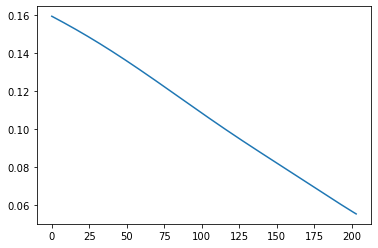

In [126]:
plt.plot(
    np.diff(block_d[:,:,X_train], axis=1).squeeze().transpose()[3,:]
)

## Plot data

(0.0, 200.0)

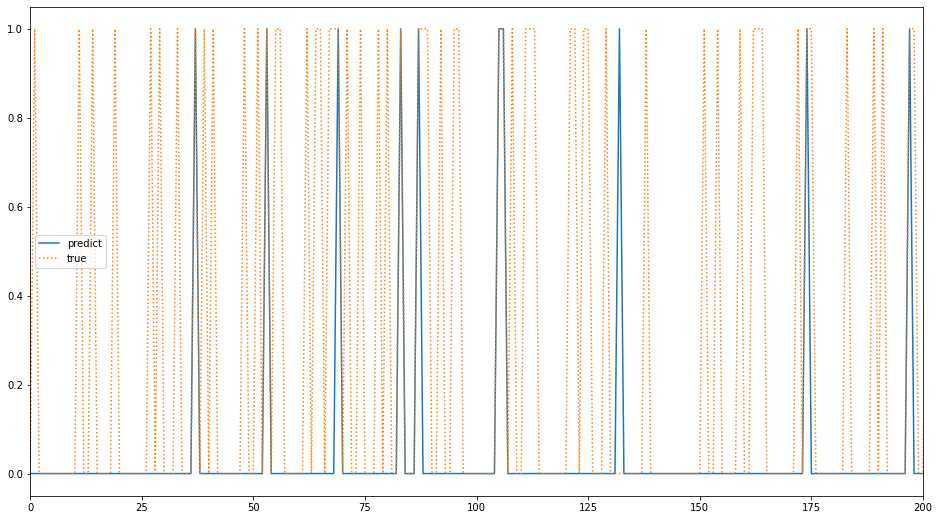

In [155]:
fig = plt.figure(figsize=[16,9])
plt.plot(y_hat, label='predict')# == y_test)
plt.plot(y_test, ':', label='true')
plt.legend()
plt.xlim([0,200])

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

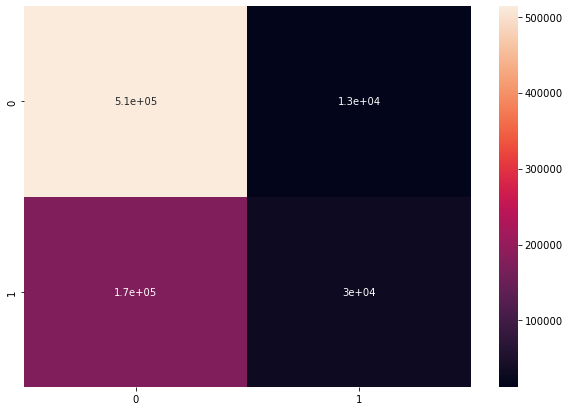

In [156]:
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
# plt.savefig('sklearn_confusion_matrix_svm_avg.png')
plt.show()

In [157]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat))

0.744683476108029


In [158]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_hat))

0.6998181431709218


In [159]:
from sklearn.metrics import recall_score


print(recall_score(y_test, y_hat))

0.1458455359384152


In [ ]:
for file in emg_files:
    filepath = os.path.join(emg_path, file)
    df       = pd.read_csv(filepath)

    fig, ax = plt.subplots(2,1)
    ax[0].plot(df.timestamp_UNIX, df.CH1)
    ax[1].plot(df.timestamp_UNIX, df.CH2)
    plt.suptitle(file[:6])

## Label data

The labeling needs to be sample by sample according to the questionnaire scores

## Segment data

## Classify data